Fri 26 JUL 2024

## Feature Combining and Expending

### การรวม Feature ด้วยการใช้ Decision Trees

In [3]:
import pandas as pd
#from sklearn.datasets import load_boston
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("boston.csv")
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
param_grid = {'max_depth': [3, 4, None]}
tree_model = GridSearchCV(DecisionTreeRegressor(random_state=0), cv = 5, scoring = 'neg_mean_squared_error', param_grid = param_grid)
# 3 แปรนี้่เป็นตัวแปรต้น ส่วน MEDV เป็นตัวแปรตาม
tree_model.fit(data[['LSTAT', 'RM', 'NOX']], data['MEDV'])

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [3, 4, None]},
             scoring='neg_mean_squared_error')

In [6]:
data['new_feat'] = tree_model.predict(data[['LSTAT', 'RM', 'NOX']])

In [7]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,new_feat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,22.650638
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,22.650638
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,33.348837
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,33.348837
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,33.348837


Text(0.5, 1.0, 'Tree derived feature vs House Price')

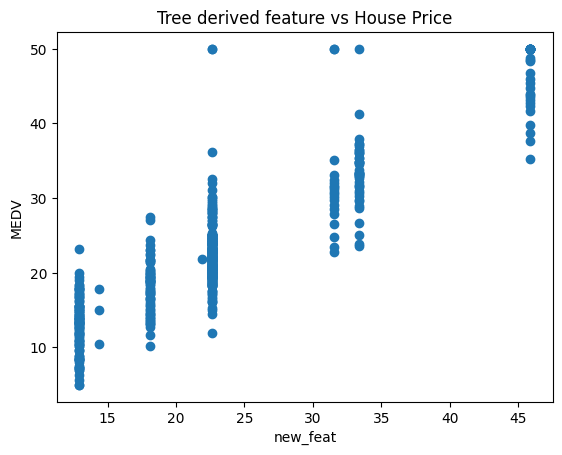

In [8]:
# ลอง Plot กับ Feature ที่สร้างขึ้นมาใหม่กับตัวแปรตาม MEDV
plt.scatter(data['new_feat'], data["MEDV"])
plt.ylabel('MEDV')
plt.xlabel('new_feat')
plt.title('Tree derived feature vs House Price')

จากการ Plot มีลักษณะ Monotonic อยู่ (เช่น x เพิ่มขึ้นแล้ว y จะเพิ่มขึ้นด้วย)

### การทำ Feature Extension โดยใช้ Polynomial

In [9]:
from sklearn.preprocessing import PolynomialFeatures

# interaction_only (default = False)
poly = PolynomialFeatures(degree = 2, interaction_only=False, include_bias=False)
poly.fit(data[['LSTAT', 'RM', 'NOX']]) # ตอนนี้สนใจ fit แค่ 3 ตัวแปรนี้

PolynomialFeatures(include_bias=False)

In [11]:
# ถ้า interaction_only = True ตัวแปรนี้จะไม่เกิดขึ้น LSTAT^2', 'RM^2', 'NOX^2'
poly.get_feature_names_out(["LSTAT", "RM", "NOX"])

array(['LSTAT', 'RM', 'NOX', 'LSTAT^2', 'LSTAT RM', 'LSTAT NOX', 'RM^2',
       'RM NOX', 'NOX^2'], dtype=object)

In [12]:
data_t = poly.transform(data[['LSTAT', 'RM', 'NOX']])

In [13]:
data_t

array([[ 4.98    ,  6.575   ,  0.538   , ..., 43.230625,  3.53735 ,
         0.289444],
       [ 9.14    ,  6.421   ,  0.469   , ..., 41.229241,  3.011449,
         0.219961],
       [ 4.03    ,  7.185   ,  0.469   , ..., 51.624225,  3.369765,
         0.219961],
       ...,
       [ 5.64    ,  6.976   ,  0.573   , ..., 48.664576,  3.997248,
         0.328329],
       [ 6.48    ,  6.794   ,  0.573   , ..., 46.158436,  3.892962,
         0.328329],
       [ 7.88    ,  6.03    ,  0.573   , ..., 36.3609  ,  3.45519 ,
         0.328329]])

In [14]:
# แปลงเป็น DataFrame
data_t = pd.DataFrame(data_t)
data_t.columns = poly.get_feature_names_out(["LSTAT", "RM", "NOX"])

In [16]:
data_t.head()

,LSTAT,RM,NOX,LSTAT^2,LSTAT RM,LSTAT NOX,RM^2,RM NOX,NOX^2
0,4.98,6.575,0.538,24.8004,32.74350,2.67924,43.230625,3.537350,0.289444
1,9.14,6.421,0.469,83.5396,58.68794,4.28666,41.229241,3.011449,0.219961
2,4.03,7.185,0.469,16.2409,28.95555,1.89007,51.624225,3.369765,0.219961
3,2.94,6.998,0.458,8.6436,20.57412,1.34652,48.972004,3.205084,0.209764
4,5.33,7.147,0.458,28.4089,38.09351,2.44114,51.079609,3.273326,0.209764


In [19]:
# โค้ดสำหรับการ Plot ดู
def plot_features(df, target):
    nb_rows = 5
    nb_cols = 4
    fig, axs = plt.subplots(nb_rows, nb_cols, figsize=(12, 12))
    plt.subplots_adjust(wspace=None, hspace=0.4)
    n = 0
    for i in range(0, nb_rows):
      for j in range(0, nb_cols):
        if n!=19:
          axs[i, j].scatter(df[df.columns[n]], target)
          axs[i, j].set_title(df.columns[n])
          n += 1
    plt.show()

IndexError: index 9 is out of bounds for axis 0 with size 9

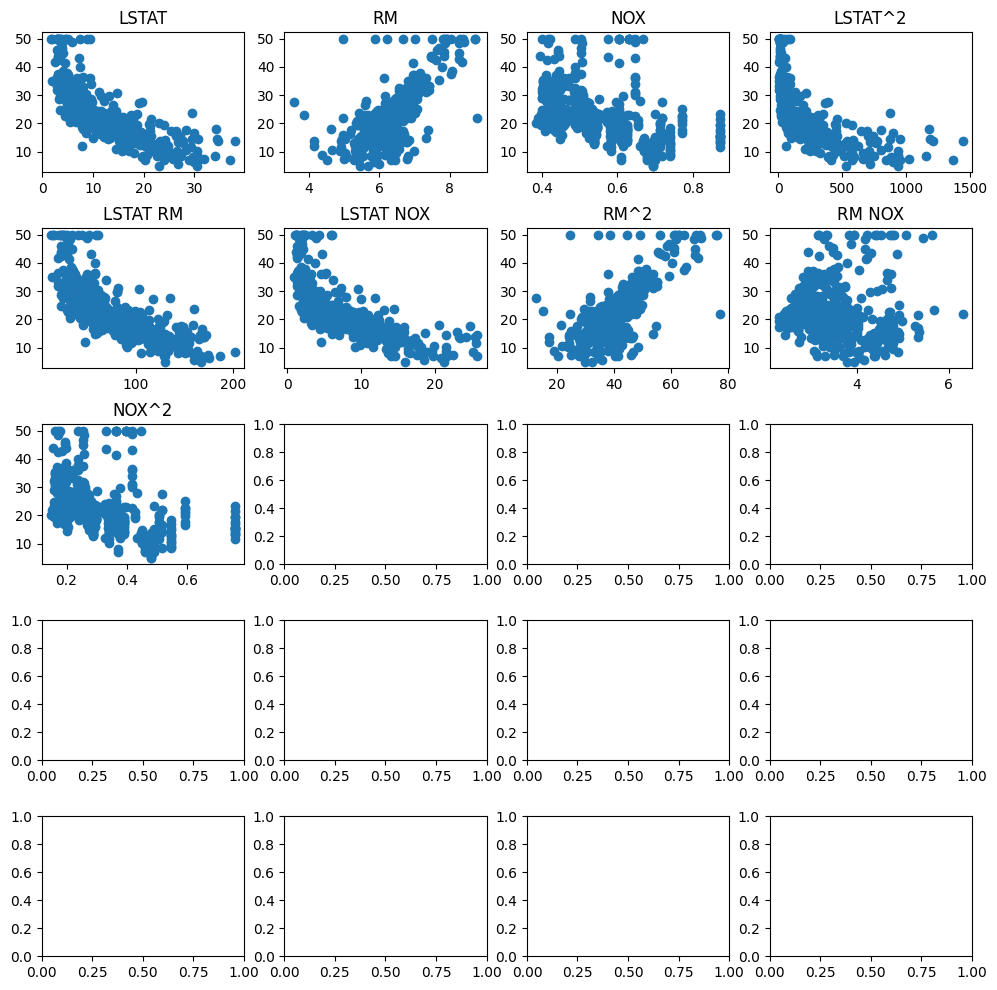

In [20]:
plot_features(data_t, data['MEDV'])

สังเกตว่า พอเอาแต่ละ Feature ไปคูณแล้ว ข้อมูลจะมีความสัมพันธ์มากขึ้น LSTAT^2, LSTAT RM, LSTAT NOX, RM^2, RM NOX, NOX^2

In [ ]:
# Data set สำหรับทำการบ้านนะ
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [ ]:
data = pd.DataFrame(breast_cancer_data.data, columns=breast_data_cance.feature_names)
data['target'] = breast_data_cance.target

In [ ]:
data.head()